In [1]:
# Import for data frame
import pandas as pd

# Imports for nltk
import string
import nltk
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')
stopwords = set(en_stopwords)

# Imports for word cloud
import wordcloud as wc
import numpy as np
from os import path
from PIL import Image
import matplotlib.pyplot as plt
% matplotlib inline

# Import Counter
from collections import Counter

## Cage Data Frame
First 10 rows of the Cage csv file as a Pandas dataframe

In [2]:
cage = pd.read_csv('nic-cage.csv')
cage = pd.DataFrame(cage)
cage.head(10)

,movie,character,voice,year
0,Spider-Man: Into the Spider-Verse,Spider-Man Noir,1,2018
1,Between Worlds,Joe,0,2018
2,Teen Titans Go! To the Movies,Superman,1,2018
3,211,Mike Chandler,0,2018
4,Looking Glass,Ray,0,2018
5,Mandy,Red Miller,0,2018
6,The Humanity Bureau,Noah Kross,0,2017
7,Mom and Dad,Brent,0,2017
8,Inconceivable,Brian,0,2017
9,Vengeance: A Love Story,John,0,2017


In [3]:
cage.tail(5)

,movie,character,voice,year
85,Racing with the Moon,Nicky,0,1984
86,Rumble Fish,Smokey,0,1983
87,Valley Girl,Randy,0,1983
88,Fast Times at Ridgemont High,Brad's Bud,0,1982
89,Best of Times,Nicholas,0,1981


## Barplot of Voice Actor Status

Most Nicolas Cage roles are live action, but some are voice-acting. The films in which Cage appears as a voice-actor are given the value 1. Live action roles are given the value 0.

<BarContainer object of 2 artists>

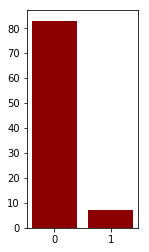

In [60]:
cage.voice.dict = {}

zero_count = 0
one_count = 0
for i in cage.voice:
    if i == 0:
        zero_count += 1
    elif i == 1:
        one_count += 1

cage.voice.dict[0] = zero_count
cage.voice.dict[1] = one_count
    
keys = list(cage.voice.dict.keys())
values = list(cage.voice.dict.values())

plt.figure(1, figsize=(2, 4))
plt.bar(keys, values,color='darkred')

## Plot of Film Year

Over time, Nicolas Cage has maintained a very steady pace of film appearances.

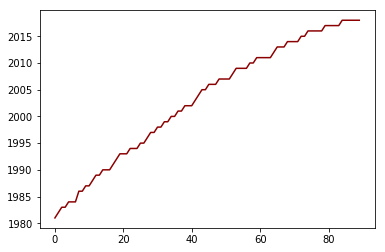

In [48]:
plt.plot(sorted(cage.year),color='darkred')

## Distribution of Film Year

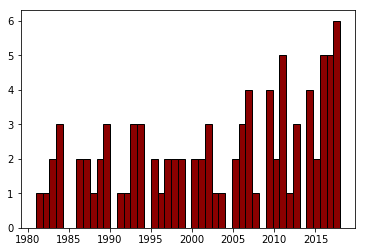

In [46]:
cage_years = [int(cage.year[i]) for i in range(90)]
count_years = Counter(cage_years)
years = count_years.keys()
amounts = count_years.values()
years

fig, ax = plt.subplots()
figsize=(10,10)
ax.hist(cage_years, facecolor='darkred', edgecolor='black',bins=45)
ax.xticks=[range(1980,2018,10)]

In [7]:
cage.movie[0]
cages = [cage.movie[i] for i in range(90)]
#cages

In [8]:
cage.character[0]
cage_chars = [cage.character[i] for i in range(90)]

## Movie Titles
First, I am printing the most common words in movie titles. Some of these repeats are due to sequels, e.g. National or Ghost. Second, I am outputting a word cloud based on all words in the movie titles that are not stopwords.

In [9]:
cage_str = ' '.join(cages)
indiv_words = cage_str.split(' ')
count_obj = Counter(indiv_words)
for c in count_obj.keys():
    if count_obj[c] > 1 and c.lower() not in stopwords:
        print(c, count_obj[c])

Men 2
Dog 2
Ghost 3
Boy 2
National 2
Man 3
Rock 2
Vegas 2
Kiss 2
Times 2


In [10]:
indivs = [i for i in indiv_words if i not in stopwords]

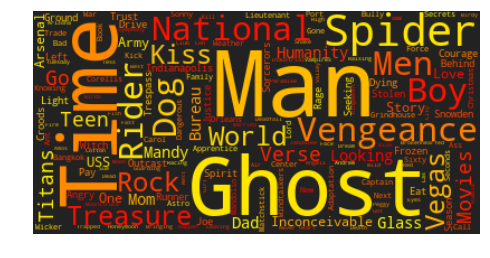

In [11]:
cage_wc = wc.WordCloud(background_color='#222222',
                       max_words=5000,
                       contour_width=0.5,
                       contour_color='#666666',
                       colormap='autumn',
                       collocations=False)

cage_wc.generate(str(indivs).replace("', '"," ").replace("'",""))
plt.figure(figsize=(8,10))
plt.imshow(cage_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Character Names
First, I am printing the character names that have appeared more than once. These include both first and last names separately. Second, I am outputting a word cloud based on all names (not just those occurring more than once).

Some duplicates are due to sequels, e.g. the National Treasure movies (Benjamin Franklin) or the Ghost Rider movies (Ghost Rider/Johnny Blaze). The most common character is Joe with 4 instances (unsure of duplicated). However, both John and Johnny are listed and one could argue for combining them.

In [12]:
cage_char_str = ' '.join(cage_chars)
indiv_words_two = cage_char_str.split(' ')
indivs_chars = [i for i in indiv_words_two]
count_obj_two = Counter(indiv_words_two)
for c in count_obj_two.keys():
    if count_obj_two[c] > 1 and c.lower() not in stopwords:
        print(c, count_obj_two[c])

Joe 4
Mike 2
Red 2
Miller 2
John 3
Eddie 2
Captain 2
Troy 2
Jack 3
Johnny 3
Blaze 2
Ghost 2
Rider 2
Benjamin 2
Franklin 2
Gates 2
Charlie 3
Kaufman 2


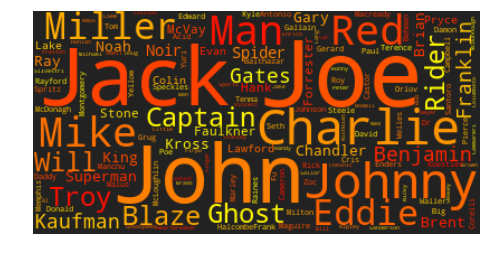

In [13]:
cage_wc.generate(str(indivs_chars).replace("', '"," ").replace("'",""))
plt.figure(figsize=(8,10))
plt.imshow(cage_wc, interpolation='bilinear')
plt.axis("off")
plt.show()